In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
caminho = "dados/chagas_dataset_oficial.xlsx"
df = pd.read_excel(caminho)
df.tail()

,ID,Name,Filename,Date Holter,Time,Sex,Nat,Event (FU-5 years),Rassi Points,Rassi Score,...,Median QTPico/TPicoQ,QTPico/TPicoQ 5th,QTPico/TPicoQ 25th,QTpico/TpicoQ 75th,QTpico/TpicoQ 98th,Perc QTend TendQ > 1,Perc QTpico TpicoQ > 1,Age,Obito_MS,Obito_MS_FU-5 years
171,172,Vicente de Paula Moreira,409.dat,2013-04-03,5.00,1,MG,0,2,0,...,0.510730,0.335220,0.435540,0.694805,2.926471,0.402810,0.140511,57,0,0
172,173,Vicente Ramos Souza,411.dat,1994-01-21,5.00,1,BA,0,8,0,...,0.912568,0.355802,0.640746,1.264249,2.337113,0.720078,0.432945,38,0,0
173,174,Waldir Furlado de Carvalho,413.dat,2006-07-13,5.00,0,AL,0,5,0,...,0.649351,0.563290,0.610922,0.694836,0.994624,0.198540,0.019401,36,0,0
174,175,Dolores Ferreira da Silva,081.dat,2015-10-22,0.22,0,PA,1,11,0,...,0.465336,0.233229,0.398169,0.517157,0.868946,0.001565,0.000782,49,1,1
175,176,Raimunda Gonçaves Silva,368.dat,1999-09-05,0.33,0,MG,1,6,0,...,0.682927,0.334008,0.627376,0.731572,1.272727,0.206872,0.051806,36,1,1


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.shape

(176, 78)


Distribuição de Sexo
Sex
0    101
1     75
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_11696\1233334303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')


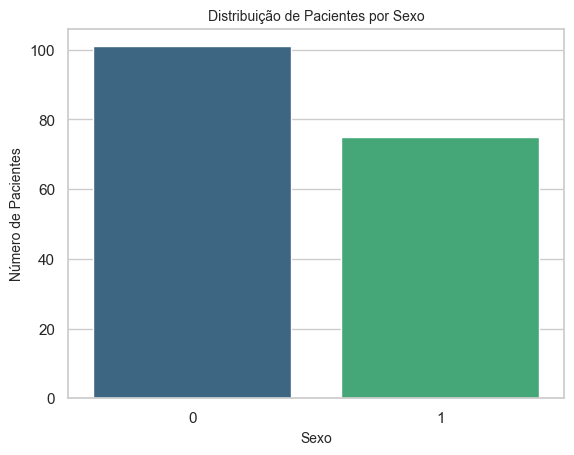

In [5]:
sns.set_theme(style="whitegrid")

print("\nDistribuição de Sexo")
print(df['Sex'].value_counts())

plt.figure()
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Distribuição de Pacientes por Sexo', fontsize=10)
plt.xlabel('Sexo', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: Distribuição de Estados
Nat
MG    41
BA    39
PB    17
PE    17
RJ    16
GO     8
AL     8
CE     7
PA     5
PI     5
ES     3
RN     2
MA     2
SP     2
RS     2
SE     1
BO     1
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_11696\1152522337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nat', data=df, palette='plasma', order=df['Nat'].value_counts().index)


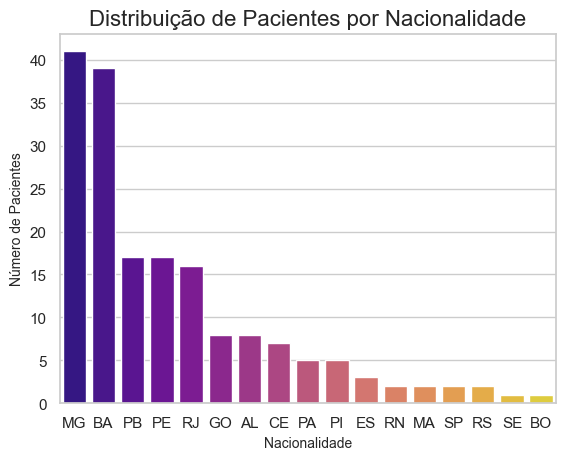

In [6]:
print("\nAnálise: Distribuição de Estados")
print(df['Nat'].value_counts())

plt.figure()
sns.countplot(x='Nat', data=df, palette='plasma', order=df['Nat'].value_counts().index)
plt.title('Distribuição de Pacientes por Nacionalidade', fontsize=16)
plt.xlabel('Nacionalidade', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: 'Event (FU-5 years)' vs 'Obito_MS'
Tabela de Contingência:
Obito_MS              0   1
Event (FU-5 years)         
0                   106   9
1                     2  59


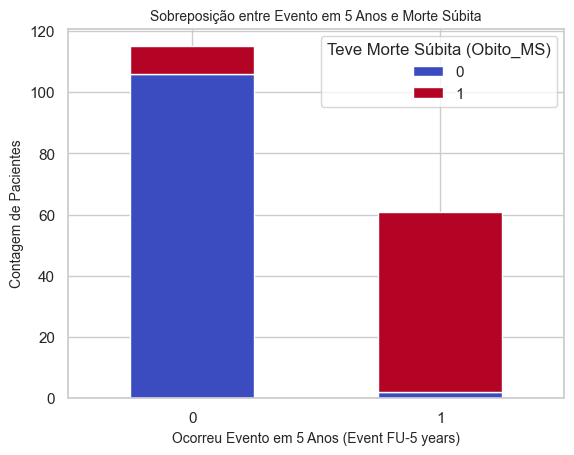

In [7]:
print("\nAnálise: 'Event (FU-5 years)' vs 'Obito_MS'")
# Tabela de contingência para ver a sobreposição
crosstab_event_obito = pd.crosstab(df['Event (FU-5 years)'], df['Obito_MS'])
print("Tabela de Contingência:")
print(crosstab_event_obito)

crosstab_event_obito.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sobreposição entre Evento em 5 Anos e Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Evento em 5 Anos (Event FU-5 years)', fontsize=10)
plt.ylabel('Contagem de Pacientes', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Teve Morte Súbita (Obito_MS)')
plt.show()


Gráfico de Dispersão para Rassi Points


C:\Users\adria\AppData\Local\Temp\ipykernel_11696\1348716156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')


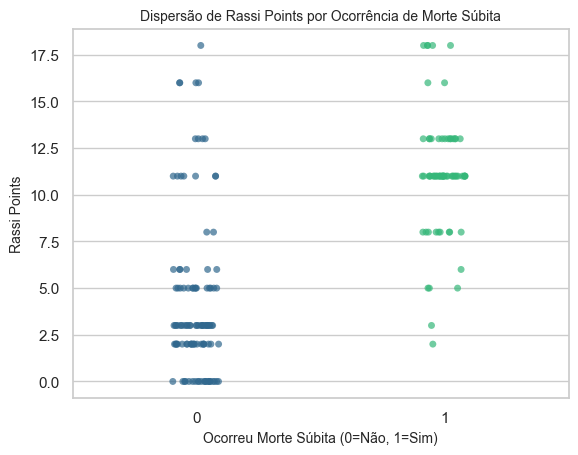

In [8]:
print("\nGráfico de Dispersão para Rassi Points")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')
    
plt.title('Dispersão de Rassi Points por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Rassi Points', fontsize=10)
plt.show()


Gráfico de Dispersão para Fração de Ejeção (FE)


C:\Users\adria\AppData\Local\Temp\ipykernel_11696\1969270547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')


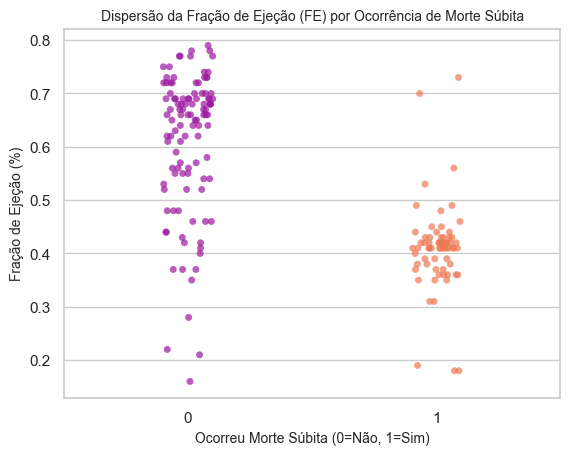

In [9]:
print("Gráfico de Dispersão para Fração de Ejeção (FE)")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')
    
plt.title('Dispersão da Fração de Ejeção (FE) por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.show()


Idade e Morte Súbita


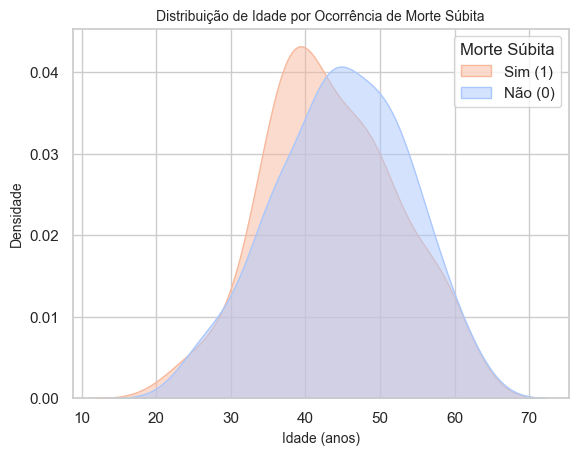

In [10]:
print("\nIdade e Morte Súbita")
plt.figure()

sns.kdeplot(data=df, x='Age', hue='Obito_MS', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('Distribuição de Idade por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Idade (anos)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Sim (1)', 'Não (0)'])
plt.show()


Distribuição da Classe de Fração de Ejeção
Distribuição da Classe_FE:
Classe_FE
0    84
2    64
1    19
3     9
Name: count, dtype: int64


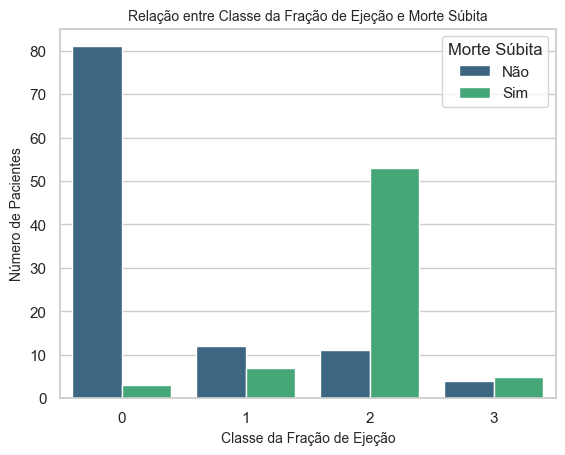

In [11]:
print("\nDistribuição da Classe de Fração de Ejeção")
print("Distribuição da Classe_FE:")
print(df['Classe_FE'].value_counts())

plt.figure()
sns.countplot(data=df, x='Classe_FE', hue='Obito_MS', palette='viridis')
plt.title('Relação entre Classe da Fração de Ejeção e Morte Súbita', fontsize=10)
plt.xlabel('Classe da Fração de Ejeção', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Não', 'Sim'])
plt.show()


Análise de Interação: FE, Morte Súbita e Sexo


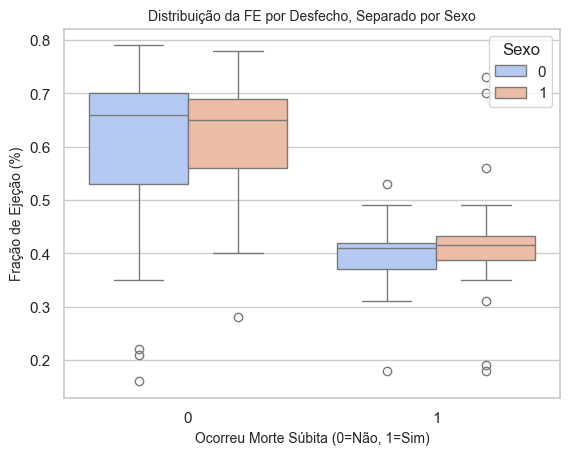

In [12]:
print("\nAnálise de Interação: FE, Morte Súbita e Sexo")
plt.figure()
sns.boxplot(data=df, x='Obito_MS', y='FE', hue='Sex', palette='coolwarm')
plt.title('Distribuição da FE por Desfecho, Separado por Sexo', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.legend(title='Sexo')
plt.show()


Features mais Correlacionadas


C:\Users\adria\AppData\Local\Temp\ipykernel_11696\3021361051.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='vlag')


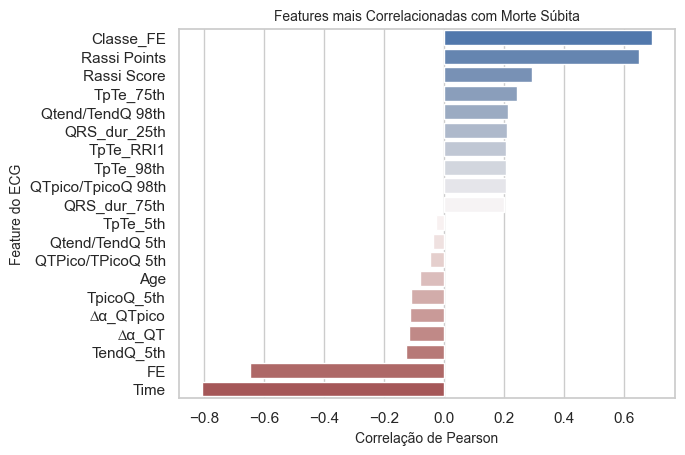

In [13]:
print("\nFeatures mais Correlacionadas")
# Selecionando apenas colunas numéricas
df_numeric = df.select_dtypes(include=np.number)

# Calculando correlação com a variável alvo
corr_com_alvo = df_numeric.corr()['Obito_MS'].sort_values(ascending=False)

# Removendo a correlação da própria variável e outras relacionadas ao desfecho
corr_com_alvo = corr_com_alvo.drop(['Obito_MS', 'Obito_MS_FU-5 years', 'Event (FU-5 years)'], errors='ignore')

# Top 10 features com correlação positiva e negativa
top_positivas = corr_com_alvo.head(10)
top_negativas = corr_com_alvo.tail(10)

# Concatenando para plotar
top_features = pd.concat([top_positivas, top_negativas])

plt.figure()
sns.barplot(x=top_features.values, y=top_features.index, palette='vlag')
plt.title('Features mais Correlacionadas com Morte Súbita', fontsize=10)
plt.xlabel('Correlação de Pearson', fontsize=10)
plt.ylabel('Feature do ECG', fontsize=10)
plt.show()

In [17]:
print(df['Rassi Points'].unique()) 
print(df['Classe_FE'].unique())

[ 2 11  8  5 13  3 18  6  0 16]
[0 2 1 3]



Análise de Correlação de Fatores de Risco com Morte Súbita

Nível de Correlação com Morte Súbita (Obito_MS):
Classe_FE              0.693612
Rassi Points           0.649833
FE                    -0.646213
Rassi Score_encoded         NaN
Name: Obito_MS, dtype: float64


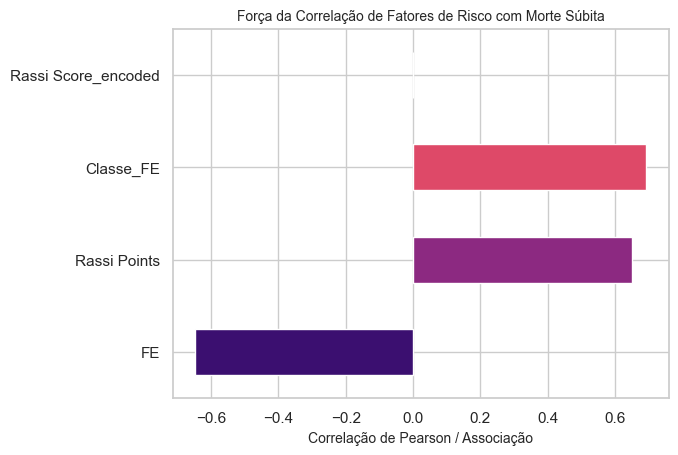

In [15]:
print("\nAnálise de Correlação de Fatores de Risco com Morte Súbita")

df_corr = df.copy()


score_map = {'Baixo': 0, 'Alto': 1}
df_corr['Rassi Score_encoded'] = df_corr['Rassi Score'].map(score_map)

colunas_interesse = [
    'Rassi Points',
    'Rassi Score_encoded',
    'FE',
    'Classe_FE', 
    'Obito_MS'
]

matriz_corr_interesse = df_corr[colunas_interesse].corr()

corr_final = matriz_corr_interesse['Obito_MS'].drop('Obito_MS')

print("\nNível de Correlação com Morte Súbita (Obito_MS):")
print(corr_final.sort_values(ascending=False))

plt.figure()
corr_final.sort_values().plot(kind='barh', color=sns.color_palette('magma', n_colors=len(corr_final)))
plt.title('Força da Correlação de Fatores de Risco com Morte Súbita', fontsize=10)
plt.xlabel('Correlação de Pearson / Associação', fontsize=10)
plt.show()

In [3]:
import pandas as pd
df = pd.read_csv('dados/mean_std_features_9min.csv')
df.shape

(176, 182)